___
# Ciência dos Dados - PROJETO 1

## Guilherme Silvarolli Aliperti- 2A
___

## Internet: Análise dos diferentes aparelhos e formas de acesso

___
## Introdução

Qual aparelho(celular ou outros aparelhos) e qual metodo de acesso(3G ou banda larga) é mais utilizado por pessoas com renda familiar per capita até 2 salários mínimos?



Variáveis de interesse:
-Faixa de renda
-Utiliza o telefone para acessar a internet
-Utiliza outros aparelhos
-Utiliza internet de dados moveis(3G ou 4G)
-Utiliza internet banda larga

___
## Análise e Resultados

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\guial\Documents\guizika\2A\Ciência dos dados\Repositório projeto 1\CD2A\Projeto1


In [4]:
dados_novo = pd.read_csv('DOM2015.csv',sep=',')

#limpando os valores invalidos
dados_2015 = dados_novo[pd.notnull(dados_novo.V4622)&pd.notnull(dados_novo.V02324)&pd.notnull(dados_novo.V02327)&pd.notnull(dados_novo.V02424)&pd.notnull(dados_novo.V02426)]

df15= pd.DataFrame()
df15["Salarios minimos per capita"] = dados_2015.V4622
df15["Acesso por telefone"] = dados_2015.V02324
df15["Outros aparelhos"] = dados_2015.V02327
df15["Uso por 3G"] = dados_2015.V02424
df15["Banda larga"] = dados_2015.V02426


In [5]:
#Categoriza 0
df15["Salarios minimos per capita"] = df15["Salarios minimos per capita"].astype("category")
df15["Salarios minimos per capita"].cat.categories = (["Sem renda", "até 1/4", "até 1/2", "até 1", "até 2","até 3","até 5","mais de 5","N/A"])

df15["Acesso por telefone"] = df15["Acesso por telefone"].astype("category")
df15["Acesso por telefone"].cat.categories = (["sim", "nao"])

df15["Outros aparelhos"] = df15["Outros aparelhos"].astype("category")
df15["Outros aparelhos"].cat.categories = (["sim", "nao"])

df15["Uso por 3G"] = df15["Uso por 3G"].astype("category")
df15["Uso por 3G"].cat.categories = (["sim", "nao"])

df15["Banda larga"] = df15["Banda larga"].astype("category")
df15["Banda larga"].cat.categories = (["sim", "nao"])

In [6]:
#Frequencias  relativas
print('Frequências relativas acesso por telefone:')
freq_telefone = (df15["Acesso por telefone"].value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(freq_telefone)
print("Outros aparelhos")
freq_outros =(df15["Outros aparelhos"].value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(freq_outros)

Frequências relativas acesso por telefone:
sim    92.9
nao     7.1
Name: Acesso por telefone, dtype: float64
Outros aparelhos
sim     0.9
nao    99.1
Name: Outros aparelhos, dtype: float64


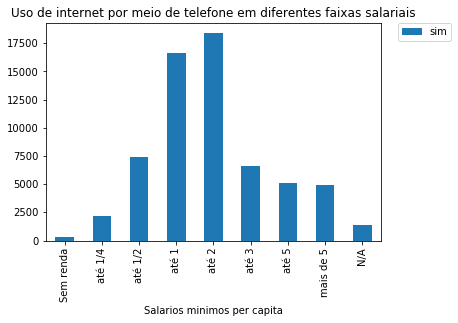

In [17]:
#Filtrando somente o sim
telefone_sim = df15["Acesso por telefone"][df15["Acesso por telefone"] == "sim"]

renda_telefone = pd.crosstab(df15["Salarios minimos per capita"], telefone_sim)
renda_telefone.plot.bar(title="Uso de internet por meio de telefone em diferentes faixas salariais").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

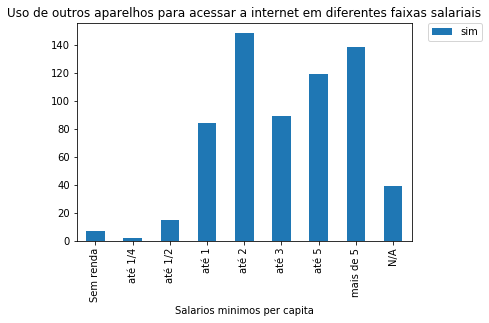

In [18]:
#Filtrando o sim de outros aparelhos
outros_sim = df15["Outros aparelhos"][df15["Outros aparelhos"] == "sim"]
renda_outros = pd.crosstab(df15["Salarios minimos per capita"], outros_sim)
renda_outros.plot.bar(title="Uso de outros aparelhos para acessar a internet em diferentes faixas salariais").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.show()

Observando os gráficos acima é possivel concluir que o uso de outros aparelhos para acessar a internet é mais comum em familias de maior renda.

Agora vamos filtrar para analisar a faixa salarial desejada.

In [9]:
#Frequencia relativa em ate 2 salarios minimos
#Filtrando somente as pessoas com a faixa de salario que desejamos analisar
dados_salario4 = df15[df15["Salarios minimos per capita"] == "até 2"]
freq_telefone4 = (dados_salario4["Acesso por telefone"].value_counts(sort=False, normalize=True)*100).round(decimals=1)
freq_outros4 = (dados_salario4["Outros aparelhos"].value_counts(sort=False, normalize=True)*100).round(decimals=1)
freq_banda = (dados_salario4["Banda larga"].value_counts(sort=False, normalize=True)*100).round(decimals=1)
freq_3g = (dados_salario4["Uso por 3G"].value_counts(sort=False, normalize=True)*100).round(decimals=1)

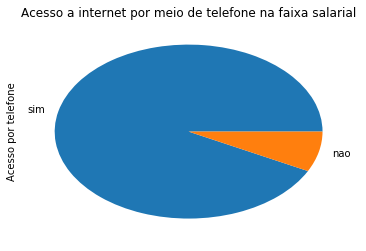

In [10]:
freq_telefone4.plot(kind = "pie")
plt.title("Acesso a internet por meio de telefone na faixa salarial")

O gráfico acima nos permite afirmar que o uso de internet por meio de telefone é mais frequente que qualquer outro aparelho na faixa salarial escolhida.


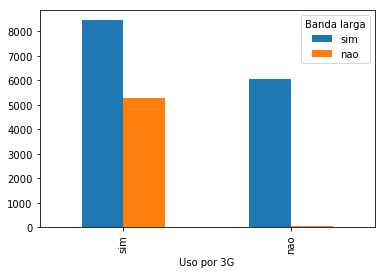

In [12]:
banda_3g = pd.crosstab(dados_salario4["Uso por 3G"], dados_salario4["Banda larga"])
banda_3g
banda_3g.plot(kind = "bar")

Atraves da análise do gráfico acima podemos afirmar que o uso por meio de dados moveis(3G ou 4G) é mais frequente que o uso da banda larga na faixa salarial escolhida. Além disso é possível observar que dificilmente alguem que não utiliza 3G vai fazer o uso de banda larga.

___
## Conclusão 

Baseado nos resultados da análise de dados do trabalho é possível concluir que na faixa salarial de até 2 salários mínimos per capita o aparelho mais utilizado para acessar a internet é o telefone e o método mais comum é dados móveis(3G).
    Além disso observei que quem nao utiliza dados móveis dificilmente vai fazer o uso de banda larga. Tal fato pode ser consequencia de um maior preço e menor acessibilidade da banda larga, porque não pode ser utilizada em qualquer lugar como o acesso por meio de dados móveis.